In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
a = df.shape[0]
b = df.shape[1]
print(a,b)

303 14


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
# print(x,y)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)
print('Training Data:', x_train.shape, y_train.shape)
print('Testing Data:', x_test.shape, y_test.shape)

Training Data: (242, 12) (242,)
Testing Data: (61, 12) (61,)


In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
x_train,x_test

(array([[-1.43641607,  0.98584243, -0.57412513, ..., -0.66169316,
         -0.70710678, -0.46472917],
        [-1.43641607,  0.98584243,  0.83106608, ..., -0.66169316,
          0.26516504, -0.46472917],
        [ 0.69617712,  0.98584243,  0.47976828, ...,  0.95577901,
         -0.70710678, -0.46472917],
        ...,
        [ 0.69617712,  1.94013791, -0.69122439, ..., -0.66169316,
         -0.70710678,  1.14190596],
        [ 0.69617712,  0.98584243,  0.36266901, ...,  0.95577901,
         -0.70710678, -0.46472917],
        [ 0.69617712,  0.03154696, -0.69122439, ..., -0.66169316,
         -0.70710678, -0.46472917]]),
 array([[ 0.69617712, -0.92274852,  0.77251645, -1.36354075, -0.41803981,
          0.90163913, -1.07375268,  1.40984195,  1.2900049 , -2.27916533,
         -0.70710678,  1.14190596],
        [ 0.69617712,  1.94013791,  2.23625729, -0.3703119 , -0.41803981,
         -0.97936664,  0.22375805, -0.70929937, -0.38883987, -0.66169316,
         -0.70710678,  1.14190596],
     

# KNN Modelling

In [21]:
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  

print(confusion_matrix(y_test, predicted))

[[22  5]
 [ 8 26]]


In [22]:
accuracy_score(y_test, predicted.round())*100

78.68852459016394

Text(0, 0.5, 'Error Rate')

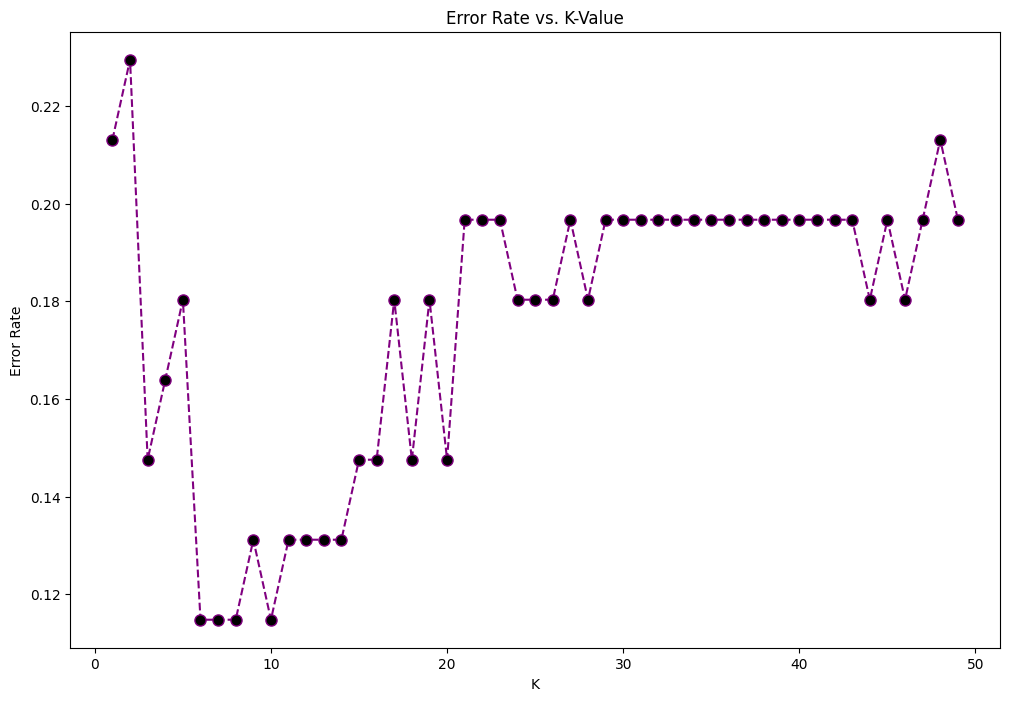

In [28]:
error_rate = []
  
for i in range(1, 50):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(12, 8))
plt.plot(range(1, 50), error_rate, color ='purple',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='black', markersize = 8)
  
plt.title('Error Rate vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
model = KNeighborsClassifier(n_neighbors = 10)
  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of KNN is :  88.52459016393442 %
